## Clustering Algorithm

In [1]:
# load iris dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
iris = load_iris()
df = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [21]:
#checking duplicates
df.duplicated().sum()

1

## Here 1 duplicate found,so we have to delete it.

In [2]:
#deleting duplicate
dfi=df.drop_duplicates()
data=dfi

In [52]:
# Checking null values
dfi.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [53]:
dfi.shape

(149, 4)

## No null values here

In [55]:
# Checking Outliers
dfi.skew()

sepal length (cm)    0.312826
sepal width (cm)     0.307149
petal length (cm)   -0.263101
petal width (cm)    -0.090076
dtype: float64

In [5]:
#Displaying column names in dataset
column_names=iris.feature_names
print(column_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


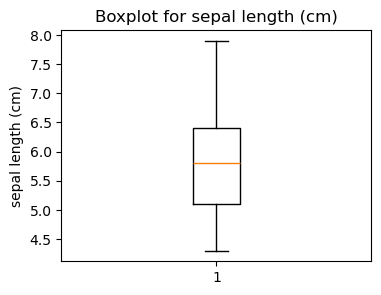

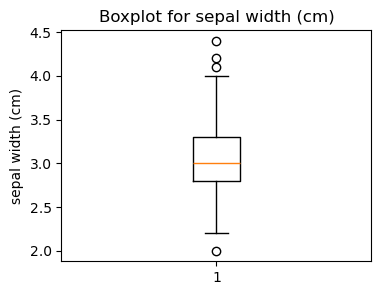

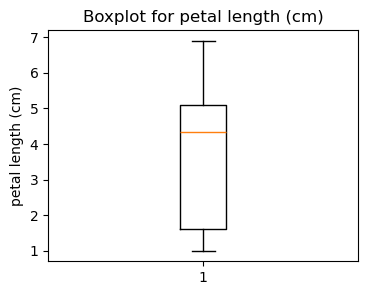

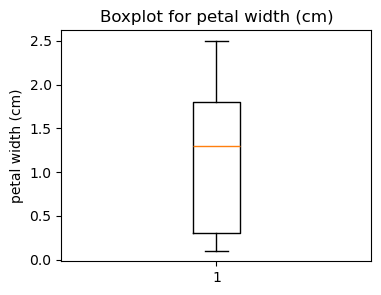

In [9]:
#boxplot for columns in dataset
for column in column_names:
    plt.figure(figsize=(4,3))
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.ylabel(column)
    plt.show()

## Here sepel width column has outliers, IQR method is not performed due to small dataset. 

## Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
X = dfi.values[:,:]
X = np.nan_to_num(X)
Clus_data = StandardScaler().fit_transform(X)
Clus_data
X = pd.DataFrame(X, columns = iris.feature_names)
print('\tStandard Scaled Dataset \n' , X)

X1 = X.copy() 


	Standard Scaled Dataset 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
144                6.7               3.0                5.2               2.3
145                6.3               2.5                5.0               1.9
146                6.5               3.0                5.2               2.0
147                6.2               3.4                5.4               2.3
148                5.9               3.0                5.1               1.8

[149 rows x 4 columns]


## Clustering Algorithm Implementation

## A) KMeans Clustering

#### * Clustering is an unsupervised learning technique used to group similar data points together into clusters based on their features.

#### * KMeans clustering is a popular unsupervised machine learning algorithm used to partition data into groups(or clusters) based on their similarity.

### STEPS FOR KMeans 

## 1. Initialization:
* Choose K, the number of clusters you want to form. This is a parameter you need to set beforehand.
* Randomly initialize K centroids (which are the center points of the clusters). These can either be randomly chosen points from the dataset or randomly placed points in the feature space.The elbow method is a technique used to determine the optimal number of clusters for a clustering algorithm, such as K-means. 
## 2. Assigning Data Points to Clusters:
* For each data point, compute the distance (usually Euclidean distance) between the point and each of the K centroids.
* Assign each data point to the cluster whose centroid is the closest.
## 3. Updating Centroids:
* Once all the data points are assigned to clusters, recalculate the centroid of each cluster. This is done by computing the mean (average) of all the points in that cluster.
## 4. Repeat the Process:
* Reassign the data points to the new centroids (steps 2 and 3).
* Continue this process until the centroids no longer change significantly or after a set number of iterations. This indicates that the algorithm has converged.
## 5. Final Clusters:
* Once the centroids have stabilized (or the algorithm has completed its iterations), the data points will be grouped into K clusters based on the proximity to the centroids.

## Why KMeans clustering suitable for iris dataset?

K-Means clustering is suitable for the Iris dataset because the dataset consists of well-separated, distinct species that can be easily grouped based on their numerical features (such as petal and sepal length and width). The clusters in the Iris dataset are approximately spherical, which aligns with K-Means' assumption that clusters are circular in shape. The dataset is relatively small and the features are continuous, making it ideal for calculating distances between data points and centroids. Additionally, the Iris dataset allows for straightforward visualization, making it easier to interpret and evaluate the results of the clustering process.

### Dimensionality Reduction

#### It is necessary to reduce features into 2,because we need to show 2D plots

In [7]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2) # reducing from 4 features to 2 
X = pca.fit_transform(X)

# Coverting the set to Dataframe
X = pd.DataFrame(X, columns = ['col-1','col-2'])  # Reduced Cols renamed as Col-1 and Col-2
print('\tDimensionality Reduction Dataset \n' , X)


	Dimensionality Reduction Dataset 
         col-1     col-2
0   -2.674170  0.319032
1   -2.704744 -0.178634
2   -2.879708 -0.144700
3   -2.736313 -0.318120
4   -2.718834  0.327305
..        ...       ...
144  1.953752  0.182135
145  1.536230 -0.382204
146  1.773860  0.073456
147  1.910099  0.115266
148  1.399034 -0.285810

[149 rows x 2 columns]


#### here we can see that columns are reduced into 2.

C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

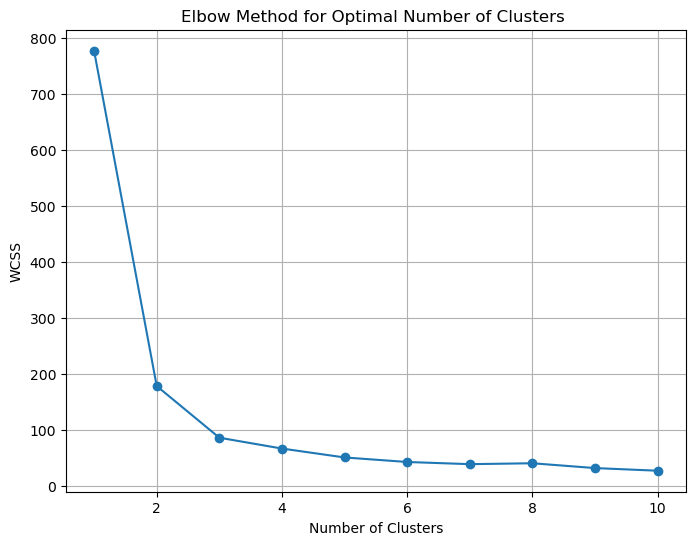

In [76]:
#KMeans implementation
from sklearn.cluster import KMeans
num_of_clusters = range(1,11)
kmeans = [KMeans(n_clusters=i) for i in num_of_clusters]
kmeans
wcss = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]
wcss
plt.figure(figsize=(8,6))
plt.plot(num_of_clusters, wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Square values
plt.title('Elbow Method for Optimal Number of Clusters ')
plt.grid(True)
plt.show()

## from this Elbow method, we get the number of clusters is 3

In [9]:
from sklearn.cluster import KMeans
#clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters =3, n_init = 18)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0
 2]


C:\Users\hp\OneDrive\Documents\PDF X\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
k_means.cluster_centers_

array([[ 2.35636794,  0.26711358],
       [-2.63266608,  0.19076047],
       [ 0.66224924, -0.33259089]])

In [13]:
#Evaluate clustering
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, labels)#close to 1-well clustered,-1-poorly clustered,0-
silhouette_avg

0.6001142078778876

## Insights

In [15]:
dfi['Clus_as_per_Km'] = labels
dfi.head(60)

C:\Users\hp\AppData\Local\Temp\ipykernel_9236\2675562160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['Clus_as_per_Km'] = labels


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clus_as_per_Km
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


### check the centroid values by averaging the features in each cluster.

In [17]:
dfi.groupby('Clus_as_per_Km').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Clus_as_per_Km,,,,
0,6.853846,3.076923,5.715385,2.053846
1,5.006000,3.428000,1.462000,0.246000
2,5.885000,2.741667,4.376667,1.426667


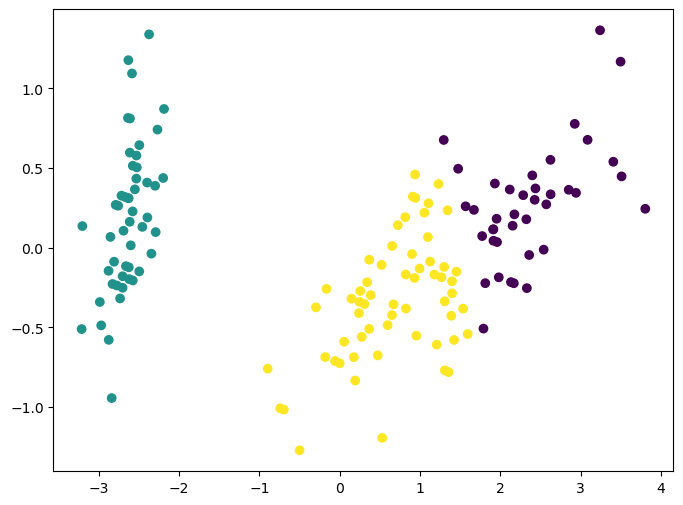

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X['col-1'], X['col-2'], c=labels)
plt.show()

## B) Hierarchical Clustering

Hierarchical clustering is an unsupervised machine learning technique that groups data points into a hierarchy of clusters. It starts by treating each data point as its own cluster, then iteratively merges the closest clusters based on a chosen distance metric (e.g., Euclidean distance). This process continues until all points are combined into a single cluster. The result is a tree-like structure called a dendrogram, which shows how clusters are formed at each step. The number of clusters can be determined by cutting the dendrogram at a specific level.

## Agglomerative Hierarchical Clustering Process 
* Initialization: 
Begin with each data point as a separate cluster. If you have n data points, you start with n clusters. 
* 
Compute Distances: 
Calculate the distance (or similarity) between each pair of clusters. Common distance measures include Euclidean distance, Manhattan distance, and cosine similarity. 
* 
Merge Clusters: 
Find the pair of clusters with the smallest distance and merge them into a single cluster. 
* Update Distances: 
After merging, update the distance matrix to reflect the new distances between the merged cluster and the remaining clusters. Different methods can be used to calculate the distance between clusters. 


## Why it is suitable for iris dataset?

Hierarchical clustering is well-suited for the Iris dataset because it can effectively group the three distinct species (setosa, versicolor, virginica) based on their features, without requiring the number of clusters to be specified upfront. The dataset is small and has well-separated clusters, making it easy to visualize the relationships between species using a dendrogram. This allows for a clear understanding of how the species group together and offers flexibility in choosing the number of clusters based on the structure revealed by the hierarchy.





In [7]:
X1_copy = X1.copy() 

In [9]:
X1 = X1_copy.copy()
X1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
from sklearn.cluster import AgglomerativeClustering
agcl = AgglomerativeClustering()
X1['cluster']=agcl.fit_predict(X1)
X1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,0
145,6.3,2.5,5.0,1.9,0
146,6.5,3.0,5.2,2.0,0
147,6.2,3.4,5.4,2.3,0


In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline
z = linkage(X1,method='ward')
lab = X.index.to_list()

dendrogram(z,labels=lab,leaf_rotation=90)


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

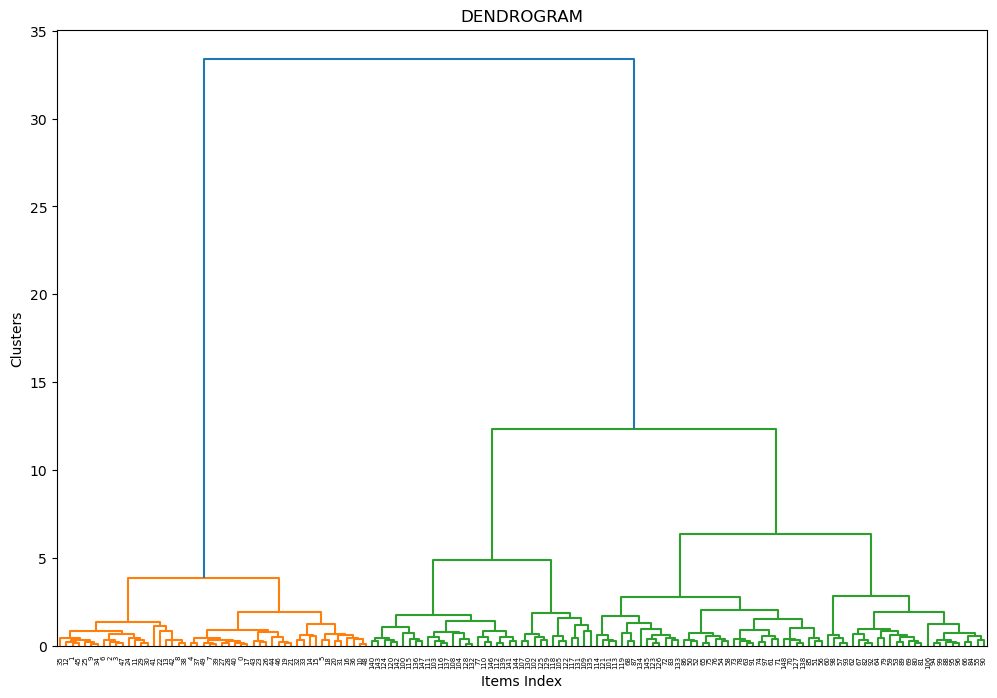

In [21]:
dendrogram(z,labels=lab,leaf_rotation=90)
plt.rcParams["figure.figsize"] = [12, 8]
plt.title('DENDROGRAM')
plt.xlabel("Items Index")
plt.ylabel('Clusters')

plt.show()